In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_csv("Public_records.csv", header=0, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) ## read in public records data

In [3]:
pd.options.display.float_format = '{:.0f}'.format
df['filed_date'] = pd.to_datetime(df['filed_date'], yearfirst=True, format='%Y%m%d') ## change formats for later analysis
df['effective_date_date_verified'] = pd.to_datetime(df['effective_date_date_verified'], yearfirst=True, format='%Y%m%d')
df['paid_date'] = pd.to_datetime(df['paid_date'], yearfirst=True, format='%Y%m%d')
df.head()

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code
0,1346747,ZP,99,CJ,2013-06-04,2013-01-29,NaT,1209,CI,I,1
1,1346748,ZP,485,7X,2014-09-25,2014-05-06,2014-09-24,nan,FE,I,1
2,1346754,Z,11R,SL,2012-01-24,2011-04-05,NaT,2248,RD,I,1
3,1346754,ZP,1,7X,2013-01-29,2012-09-28,2013-01-28,nan,FE,C,1
4,1346756,ZP,1,RL,2014-09-13,2007-02-02,2014-08-01,406,RD,I,1


In [4]:
df_loans = pd.read_csv("Loan_performance.csv", header=0) ### read in loan performance data 
df_loans.head()

,analytics_matchkey,max_loan_amount,late_30_days,late_60_days,late_90_days
0,1346745,2500,0,0,0
1,1346746,1000,0,0,0
2,1346747,1002,0,0,0
3,1346748,1500,0,0,0
4,1346749,1675,0,0,0


In [5]:
df_joined = df.merge(df_loans, left_on="analytics_matchkey", right_on='analytics_matchkey', how='outer', indicator=True)

In [6]:
df_joined.head() ## view the outerjoined dataframe of public records data and loan performance data 

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,max_loan_amount,late_30_days,late_60_days,late_90_days,_merge
0,1346747,ZP,99,CJ,2013-06-04,2013-01-29,NaT,1209,CI,I,1,1002,0,0,0,both
1,1346748,ZP,485,7X,2014-09-25,2014-05-06,2014-09-24,nan,FE,I,1,1500,0,0,0,both
2,1346754,Z,11R,SL,2012-01-24,2011-04-05,NaT,2248,RD,I,1,1025,0,0,0,both
3,1346754,ZP,1,7X,2013-01-29,2012-09-28,2013-01-28,nan,FE,C,1,1025,0,0,0,both
4,1346756,ZP,1,RL,2014-09-13,2007-02-02,2014-08-01,406,RD,I,1,2500,0,0,0,both


In [7]:
print(df_joined._merge.unique()) ## all records from public records were joined
print(len(df_loans['analytics_matchkey'].unique()))
## additional records only from loan_performance data added to dataframe
## loan data includes 646,127 unique matchkeys 

[both, right_only]
Categories (2, object): [both, right_only]
646127


In [8]:
days_90_1  = df_loans[df_loans['late_90_days'] == 1]
days_60_1 = df_loans[df_loans['late_60_days'] == 1]
days_30_1 = df_loans[df_loans['late_30_days'] == 1]

print(len(days_90_1['analytics_matchkey'].unique())/len(df_loans['analytics_matchkey'].unique()) * 100)
print(len(days_60_1['analytics_matchkey'].unique())/len(df_loans['analytics_matchkey'].unique()) * 100)
print(len(days_30_1['analytics_matchkey'].unique())/len(df_loans['analytics_matchkey'].unique()) * 100)
# ~8% of customers from the loans data have been at least 90 days late with a loan
# ~9% of customers from the loans data have been at least 60 days late with a loan
# ~12% of customers from the loans data have been at least 30 days late with a loan

8.160160463809746
9.155939931313812
12.156897947307572


In [9]:
print(df_joined[df_joined['_merge'] =='right_only'].shape[0])
right_only = df_joined[df_joined['_merge'] =='right_only']
print(len(right_only['analytics_matchkey'].unique())) 
## confirm that all matchkeys from loan performance data unique, no duplicates 
### 511,410 matchkeys from loan data are not included in public records data set

511410
511410


In [10]:
df_joined[df_joined['_merge'] =='right_only'].head()

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,max_loan_amount,late_30_days,late_60_days,late_90_days,_merge
218303,1346745,NaN,NaN,NaN,NaT,NaT,NaT,nan,NaN,NaN,nan,2500,0,0,0,right_only
218304,1346746,NaN,NaN,NaN,NaT,NaT,NaT,nan,NaN,NaN,nan,1000,0,0,0,right_only
218305,1346749,NaN,NaN,NaN,NaT,NaT,NaT,nan,NaN,NaN,nan,1675,0,0,0,right_only
218306,1346750,NaN,NaN,NaN,NaT,NaT,NaT,nan,NaN,NaN,nan,2000,0,0,0,right_only
218307,1346751,NaN,NaN,NaN,NaT,NaT,NaT,nan,NaN,NaN,nan,2500,0,0,0,right_only


In [11]:
df_joined[df_joined['_merge'] =='both'].shape[0] ## confirm all records from public records set joined to

218303

In [12]:
df_join_left = df.merge(df_loans, left_on="analytics_matchkey", right_on='analytics_matchkey', how='left')

In [13]:
df_join_left.head() ## only left join so we match existing data from public records dataset

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,max_loan_amount,late_30_days,late_60_days,late_90_days
0,1346747,ZP,99,CJ,2013-06-04,2013-01-29,NaT,1209,CI,I,1,1002,0,0,0
1,1346748,ZP,485,7X,2014-09-25,2014-05-06,2014-09-24,nan,FE,I,1,1500,0,0,0
2,1346754,Z,11R,SL,2012-01-24,2011-04-05,NaT,2248,RD,I,1,1025,0,0,0
3,1346754,ZP,1,7X,2013-01-29,2012-09-28,2013-01-28,nan,FE,C,1,1025,0,0,0
4,1346756,ZP,1,RL,2014-09-13,2007-02-02,2014-08-01,406,RD,I,1,2500,0,0,0


In [14]:
days_90  = df_join_left[df_join_left['late_90_days'] == 1]
days_60 = df_join_left[df_join_left['late_60_days'] == 1]
days_30 = df_join_left[df_join_left['late_30_days'] == 1]

print(len(days_90['analytics_matchkey'].unique())/len(df_join_left['analytics_matchkey'].unique()) * 100)
print(len(days_60['analytics_matchkey'].unique())/len(df_join_left['analytics_matchkey'].unique()) * 100)
print(len(days_30['analytics_matchkey'].unique())/len(df_join_left['analytics_matchkey'].unique()) * 100)
# ~10% of customers from public records data have been at least 90 days late with a loan
# ~11% of customers from public records data have been at least 60 days late with a loan
# ~14% of customers from public records data have been at least 30 days late with a loan

10.05960643422879
10.95036261199403
13.914353793507871


In [15]:
days_30.head()

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,max_loan_amount,late_30_days,late_60_days,late_90_days
7,1346760,Z,13Q,CJ,2016-06-22,2016-04-01,NaT,10116,CI,I,1,1500,1,1,0
14,1346786,ZP,35K,7X,2010-11-27,2010-07-29,2010-11-23,nan,FE,I,1,2600,1,1,1
34,1346890,ZP,87,CJ,2012-12-27,2012-05-18,NaT,666,CI,I,1,1000,1,0,0
48,1346901,ZP,126,CJ,2016-08-20,2016-07-05,NaT,1000,MU,I,1,1675,1,1,1
50,1346911,Z,459,CJ,2011-02-09,2010-05-26,NaT,767,CI,C,2,2500,1,0,0


In [16]:
df_join_left['max_loan_amount'].describe() ## maximum loan amounts all range between $1,000 - $4,000

count   218303
mean      1683
std        716
min       1000
25%       1100
50%       1500
75%       2000
max       4000
Name: max_loan_amount, dtype: float64

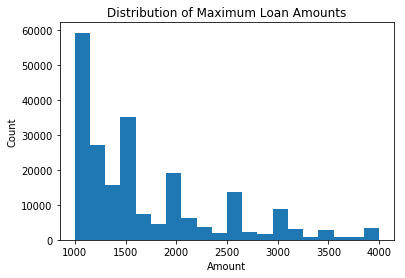

In [17]:
plt.title("Distribution of Maximum Loan Amounts") ### to see the shape of the distribution of max loan amounts, which is right skewed. 
plt.ylabel("Count")
plt.xlabel("Amount")
plt.hist(df_join_left['max_loan_amount'], bins=20); 
### most max_loan_amounts are $1000, followed by $1500, then $2,000...etc

In [18]:
df_join_left['amount_paid_minus_max_loan_amount'] = df_join_left['amount'] - df_join_left['max_loan_amount']

In [19]:
df_join_left['amount_paid_minus_max_loan_amount'].describe()

count    156792
mean       2956
std       41797
min       -4000
25%        -891
50%        -135
75%        1608
max     9998674
Name: amount_paid_minus_max_loan_amount, dtype: float64

c:\users\roblatch\desktop\python35\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\roblatch\desktop\python35\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


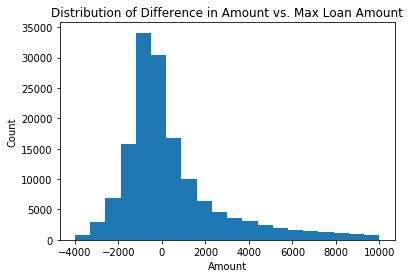

In [20]:
plt.title("Distribution of Difference in Amount vs. Max Loan Amount")
plt.ylabel("Count")
plt.xlabel("Amount")
plt.hist(df_join_left['amount_paid_minus_max_loan_amount'], range=(df_join_left['amount_paid_minus_max_loan_amount'].min(), 10000), bins=20); 
## more than 50% of the amounts are less than the maximum loan amount
### However there is a very long tail with some amounts much higher than the max_loan_amounts

In [21]:
df_join_left[df_join_left['amount'] > df_join_left['max_loan_amount']].shape[0] / df_join_left.shape[0] * 100
# About 1/3 of the loans have amounts higher than the max_loan_amount

33.38616510080026

In [22]:
days_30_late_public_record_types = days_30.groupby('public_record_type_code')['late_30_days'].sum().sort_values(ascending=False)
days_30_late_public_record_types
### most of the loans that were at least 30 days late were of type CJ

public_record_type_code
CJ    10083
7X     6368
PC     3931
SL     2867
RL     2690
CB     1840
FT     1351
3D     1043
PL      796
PF      513
3X      355
3F      318
TL      269
7D      168
7F       65
CP       56
1X        3
1D        3
2X        1
Name: late_30_days, dtype: int64

In [23]:
df_join_left.groupby('public_record_type_code').size().sort_values(ascending=False)[0:5]

public_record_type_code
CJ    61425
7X    49842
PC    30449
RL    20099
SL    16205
dtype: int64

In [24]:
days_30['amount'].describe() ## higher mean for amount for loans that were at least 30 days late, though could be skewed by the 9999999s

count     24396
mean       5774
std       69011
min           0
25%         666
50%        1409
75%        3464
max     9999999
Name: amount, dtype: float64

In [25]:
days_30['max_loan_amount'].describe() ##slightly higher mean for max_loan_amount for loans that were at least 30 days late

count   32720
mean     1731
std       766
min      1000
25%      1100
50%      1458
75%      2126
max      4000
Name: max_loan_amount, dtype: float64

In [26]:
amounts_included = df_join_left[df_join_left['amount'].notna()]
amounts_included = amounts_included[amounts_included['amount'] < 400000] ## remove extreme outliers 

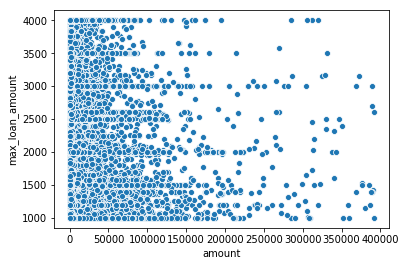

In [27]:
sns.scatterplot(amounts_included['amount'], amounts_included['max_loan_amount']) ## not a clear relationship overall!

<Figure size 720x720 with 0 Axes>

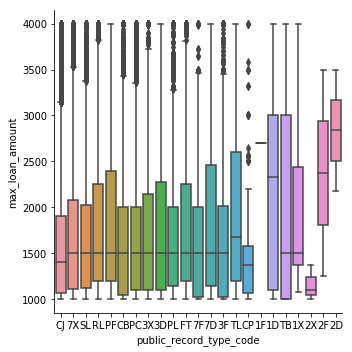

In [28]:
plt.figure(figsize=(10,10)) ## investigation the disribution of max_loan_amounts for each publc_record_type
sns.catplot(x='public_record_type_code', y='max_loan_amount', kind="box", data=df_join_left); 

<Figure size 720x720 with 0 Axes>

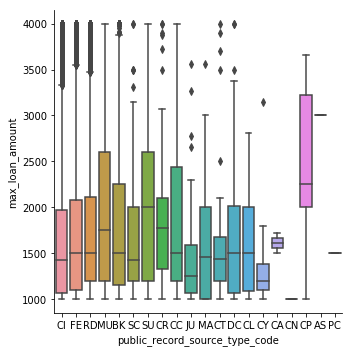

In [29]:
plt.figure(figsize=(10,10)) ## investigating the disribution of max_loan_amounts for each publc_record_source_type
sns.catplot(x='public_record_source_type_code', y='max_loan_amount', kind="box", data=df_join_left);

## MU has a higher than average max_loan amount and a much longer IQR, SU has an even greater average

In [30]:
days_30_late_public_record_types
days_30_late_public_record_types_df = days_30_late_public_record_types.to_frame()
days_30_late_public_record_types_df.head()

,late_30_days
public_record_type_code,
CJ,10083
7X,6368
PC,3931
SL,2867
RL,2690


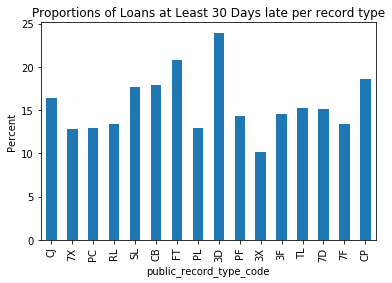

In [31]:
total_loans_per_record_type = df_join_left.groupby('public_record_type_code').size().sort_values(ascending=False)
total_loans_per_record_type_df = total_loans_per_record_type.to_frame()
total_loans_per_record_type_df
proportion_records_late_df = total_loans_per_record_type_df.merge(days_30_late_public_record_types_df, left_index=True, right_index=True, how='left')

proportion_records_late_df = proportion_records_late_df.rename(columns={0:'Total_Records'})
proportion_records_late_df['proportion_late'] = (proportion_records_late_df.late_30_days/proportion_records_late_df.Total_Records)*100
proportion_records_late_df = proportion_records_late_df.sort_values(by='Total_Records', ascending=False) ## sort by quantity of type
proportion_records_late_df = proportion_records_late_df.fillna(0)
proportion_records_late_df = proportion_records_late_df.drop(['Total_Records', 'late_30_days'], axis=1)
proportion_records_late_df = proportion_records_late_df.squeeze() ## change to series
proportion_records_late_df = proportion_records_late_df.drop(proportion_records_late_df.index[-7:]) ## drop data with only a few values
proportion_records_late_df

fig = proportion_records_late_df.plot(kind='bar')
fig.set_title("Proportions of Loans at Least 30 Days late per record type")
fig.set_ylabel('Percent');  ## x axis ordered by overall proportion of type in dataset
## 3D followed by FT have the highest proportion of loans at least 30 days late

In [32]:
days_30_late_public_record_source_types = days_30.groupby('public_record_source_type_code')['late_30_days'].sum().sort_values(ascending=False)
days_30_late_public_record_source_types_df = days_30_late_public_record_source_types.to_frame()
days_30_late_public_record_source_types_df.head()
### most of the loans that were at least 30 days late were of type CJ

,late_30_days
public_record_source_type_code,
CI,14939
RD,8503
FE,7825
MU,708
BK,499


In [33]:
total_loans_per_record_source_type = df_join_left.groupby('public_record_source_type_code').size().sort_values(ascending=False)
total_loans_per_record_source_type_df = total_loans_per_record_source_type.to_frame()
total_loans_per_record_source_type_df.head()

,0
public_record_source_type_code,
CI,97445
FE,58896
RD,54657
MU,3291
BK,2611


In [34]:
proportion_records_source_late_df = total_loans_per_record_source_type_df.merge(days_30_late_public_record_source_types_df, left_index=True, right_index=True, how='left')

proportion_records_source_late_df = proportion_records_source_late_df.rename(columns={0:'Total_Records'})
proportion_records_source_late_df['proportion_late'] = (proportion_records_source_late_df.late_30_days/proportion_records_source_late_df.Total_Records)*100
proportion_records_source_late_df = proportion_records_source_late_df.sort_values(by='Total_Records', ascending=False) ## sort by quantity of type
proportion_records_source_late_df = proportion_records_source_late_df.fillna(0)
proportion_records_source_late_df = proportion_records_source_late_df.drop(['Total_Records', 'late_30_days'], axis=1)
proportion_records_source_late_df = proportion_records_source_late_df.squeeze() ## change to series
proportion_records_source_late_df = proportion_records_source_late_df.drop(proportion_records_source_late_df.index[-8:]) ## drop data with only a few values
proportion_records_source_late_df

public_record_source_type_code
CI   15
FE   13
RD   16
MU   22
BK   19
SU   24
CC   16
CR   12
SC   18
DC   14
JU    6
CT   10
Name: proportion_late, dtype: float64

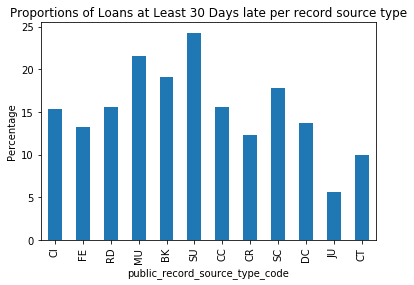

In [35]:
fig = proportion_records_source_late_df.plot(kind='bar')
fig.set_title("Proportions of Loans at Least 30 Days late per record source type")
fig.set_ylabel('Percentage');  ## x axis ordered by overall proportion of source type in dataset
## SU and MU source_type_codes the most problamatic overall, both of which also have higher average max_loan_amounts

In [36]:
df_join_left.head()

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,max_loan_amount,late_30_days,late_60_days,late_90_days,amount_paid_minus_max_loan_amount
0,1346747,ZP,99,CJ,2013-06-04,2013-01-29,NaT,1209,CI,I,1,1002,0,0,0,207
1,1346748,ZP,485,7X,2014-09-25,2014-05-06,2014-09-24,nan,FE,I,1,1500,0,0,0,nan
2,1346754,Z,11R,SL,2012-01-24,2011-04-05,NaT,2248,RD,I,1,1025,0,0,0,1223
3,1346754,ZP,1,7X,2013-01-29,2012-09-28,2013-01-28,nan,FE,C,1,1025,0,0,0,nan
4,1346756,ZP,1,RL,2014-09-13,2007-02-02,2014-08-01,406,RD,I,1,2500,0,0,0,-2094


In [37]:
df_join_left['month'] = df_join_left['filed_date'].dt.month ## processing date values for aggregate analysis
df_join_left['year'] = df_join_left['filed_date'].dt.year
late_per_year = df_join_left.groupby('year')['late_30_days'].sum()
records_per_year = df_join_left.groupby('year').size() ## total records per year
records_per_year_df = records_per_year.to_frame()
late_per_year_df = late_per_year.to_frame()

In [38]:
proportion_records_late_year_df = records_per_year_df.merge(late_per_year_df, left_index=True, right_index=True, how='left')
proportion_records_late_year_df.head()

,0,late_30_days
year,,
2006,866,118
2007,5236,588
2008,7694,852
2009,15983,1990
2010,37974,5266


In [39]:
proportion_records_late_year_df = proportion_records_late_year_df.rename(columns={0:'Total_Records'})
proportion_records_late_year_df['proportion_late'] = (proportion_records_late_year_df.late_30_days/proportion_records_late_year_df.Total_Records)*100
proportion_records_late_year_df = proportion_records_late_year_df ## keep it in year order
proportion_records_late_year_df = proportion_records_late_year_df.drop(['Total_Records', 'late_30_days'], axis=1)
proportion_records_late_year_df = proportion_records_late_year_df.squeeze() ## change to series
proportion_records_late_year_df

year
2006   14
2007   11
2008   11
2009   12
2010   14
2011   14
2012   15
2013   16
2014   17
2015   18
2016   19
Name: proportion_late, dtype: float64

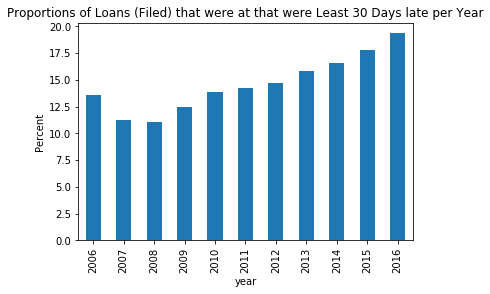

In [40]:
fig = proportion_records_late_year_df.plot(kind='bar');
fig.set_title("Proportions of Loans (Filed) that were at that were Least 30 Days late per Year")
fig.set_ylabel('Percent');  ## x axis ordered by year chronologically
## greater proportion of loans are later than in previous years, for the most part

In [41]:
df_join_left['amount'].describe()

count    156792
mean       4617
std       41801
min           0
25%         644
50%        1338
75%        3174
max     9999999
Name: amount, dtype: float64

In [42]:
df_join_left['max_loan_amount'].describe() 

count   218303
mean      1683
std        716
min       1000
25%       1100
50%       1500
75%       2000
max       4000
Name: max_loan_amount, dtype: float64

In [43]:
medical = df_join_left[df_join_left['legislative_prohibited_code'] == 2]
medical_customers = len(medical['analytics_matchkey'].unique())
## assuming 2 is the indicator variable that the loan is medical related
## are loans more likely to be paid late if they are medically related? Apparently Not...
late_medical = df_join_left[(df_join_left['legislative_prohibited_code'] == 2) & (df_join_left['late_30_days'] == 1)]
late_medical_customers = len(late_medical['analytics_matchkey'].unique())
late_medical_customers/medical_customers * 100 ## almost 13% of all customers that had medical loans also paid late
late =  df_join_left[df_join_left['late_30_days'] == 1]
late_customers = len(late['analytics_matchkey'].unique())
customers = len(df_join_left['analytics_matchkey'].unique())
late_medical_customers/late_customers * 100 
## only 8.49% of loans that were paid late (at least 30 days) were medical related
medical_customers/customers * 100 ##only 9.1% of loans are medically related anyway
late_customers/customers * 100 ## about 13.91% of the customers have been 30 days late 
## Given that less than 13% of the customers with medical loans paid late, yet 13.91% of all customers have been late,
## then a customer with a medical loan doesn't have a higher probability of paying late than a customer without one

13.914353793507871

In [44]:
df_join_left['industry_code_kind_of_business'].unique() 
## not sure what these codes mean, but is one more likely to be late than the other?

array(['ZP', 'Z'], dtype=object)

In [45]:
ZP = df_join_left[df_join_left['industry_code_kind_of_business'] == 'ZP']
ZP_customers = len(ZP['analytics_matchkey'].unique())
ZP_late = df_join_left[(df_join_left['industry_code_kind_of_business'] == 'ZP') & (df_join_left['late_30_days'] == 1)]
ZP_late_customers = len(ZP_late['analytics_matchkey'].unique())
Z = df_join_left[df_join_left['industry_code_kind_of_business'] == 'Z']
Z_customers = len(Z['analytics_matchkey'].unique())
Z_late = df_join_left[(df_join_left['industry_code_kind_of_business'] == 'Z') & (df_join_left['late_30_days'] == 1)]
Z_late_customers = len(Z_late['analytics_matchkey'].unique())

ZP_late_customers/ZP_customers * 100 ## almost 14% of the customers with ZP industry code were late
ZP_late_customers/late_customers * 100 ## 93.9% of late customers (at least 30 days) had industry code ZP
Z_late_customers/Z_customers * 100 ## over 14.62% of the customers with Z industry code were late
Z_late_customers/late_customers * 100 ## 9.7% of the late customers (at least 30 days) had industry code Z

print(ZP_customers/customers * 100) ## 93.67 % of customers are of type ZP
print(Z_customers/customers * 100) ## 9.23% of customers of type Z
late_customers/customers * 100 ## about 13.91% of the customers have been 30 days late 
## However, these proportions are about the same as the overall proportions of type Z and ZP in the dataset, 
## so neither is helpful as a predictor of lateness

93.67191965379277
9.237883860240355


13.914353793507871

In [46]:
## If a person has a higher max_loan_amount, are they more likely to be late?
df_join_left['max_loan_amount'].describe()

count   218303
mean      1683
std        716
min       1000
25%       1100
50%       1500
75%       2000
max       4000
Name: max_loan_amount, dtype: float64

In [47]:
above_75_max_loans = df_join_left[df_join_left['max_loan_amount'] > 2000]
## only those with greater than average max_loan_amount
above_75_max_loans.head()
above_75_max_and_late = above_75_max_loans[above_75_max_loans['late_30_days'] == 1]
customers_late_and_above_75 = len(above_75_max_and_late['analytics_matchkey'].unique())

## 5,359 of customers had max_loan amounts above the 75th percentile and were late
customers_above_75 = len(above_75_max_loans['analytics_matchkey'].unique())

## 33,495 customers had max_loan_amounts above the 75th percentile
customers_late_and_above_75/customers_above_75 * 100
### 15.99 % of customers with above 75th percentile max_loan_amounts were also late

###Therefore, customers in the top 25% of max loan amounts are slightly more likely to be late than other customers

15.99940289595462

In [48]:
below_25_max_loans = df_join_left[df_join_left['max_loan_amount'] <= 1100]
below_25_max_and_late = below_25_max_loans[below_25_max_loans['late_30_days'] == 1]
customers_late_and_below_25 = len(below_25_max_and_late['analytics_matchkey'].unique())
customers_late_and_below_25
## 4,734 customers were below the 25th percentile for max_loan_amount and were late
customers_below_25 = len(below_25_max_loans['analytics_matchkey'].unique())
customers_below_25
## 34,288 customers had max_loan_amounts below the 25th percentile
customers_late_and_below_25/customers_below_25 * 100
## only 13.8% of the customers below the 25th percentile for max_loan_amount were late, so not more likely than other
## customers to be late 

13.806579561362575

In [49]:
df_join_left['amount'].describe()

count    156792
mean       4617
std       41801
min           0
25%         644
50%        1338
75%        3174
max     9999999
Name: amount, dtype: float64

In [50]:
Top_25_amount_and_late = days_30[days_30['amount'] > 3174]
len(Top_25_amount_and_late['analytics_matchkey'].unique())/len(days_30['analytics_matchkey'].unique()) * 100
Top_25_amount = df_join_left[df_join_left['amount'] > 3174]
Top_25_amount = len(Top_25_amount['analytics_matchkey'].unique())
len(Top_25_amount_and_late['analytics_matchkey'].unique())/Top_25_amount * 100
## 25.644% of customers who were at least 30 days late had amounts in the top 25th percentile
## 15.588% of customers in the top 25% of the amounts were late, higher proportion than in the overall dataset

15.587911018872818

In [51]:
### So far, I have noticed that loans of source_type MU and SU are more likely to be paid late, as well as loans with type 
## FT and 3D. Generally, customers with higher 'max_loan_amounts' and higher 'amounts' are more likely to be late 
## I think it would be best to analyze only the more recent data to capture the most relevant/current trends, maybe just 
## 2015 and 2016 - especially to check that the more problematic record_types and source_types are still the same in more 
## recent years than when looking at our entire dataset
## Given that the year over year analyisis of the proportion of loans that were late increased after from 2007 forward,
## a time series analysis that looks for trend and seasonality in the data would be very useful for predicting
## which loans would be late, given that in general the proportion of late loans is trending up
## If we looked more closely at seasonality with month-year over the years 2006 - 2016, we may see that loans filed at a 
## certain time of year are more likely to be paid late than loans filed at other times in the year 